# Example 1 - first order ODE

\begin{equation}
2y'-5y=x+6,  y(0)=10
\end{equation}

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# Define a function which calculates the derivative
def dy_dx(y, x):
    return (x + 6 + 5*y)/2

xs = np.linspace(0,5,100)
y0 = 10  # the initial condition
ys = odeint(dy_dx, y0, xs)
ys = np.array(ys).flatten()

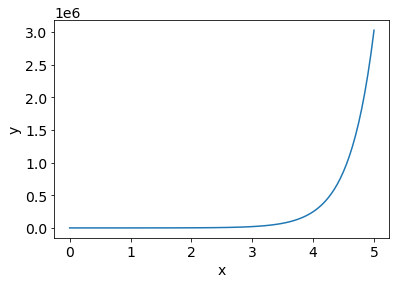

In [2]:
# Plot the numerical solution
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xs, ys, label='numerical')

# Example 2 - a system of first order ODES

\begin{equation}
\frac{dx}{dt} = -5x(t)+10u(t) \tag{1}
\end{equation}

\begin{equation}
7 \frac{dy}{dt} = -2y(t) + 5x(t) \tag{2}
\end{equation}

\begin{equation}
u(t) = S(t-3), x(0)=y(0)=0
\end{equation}

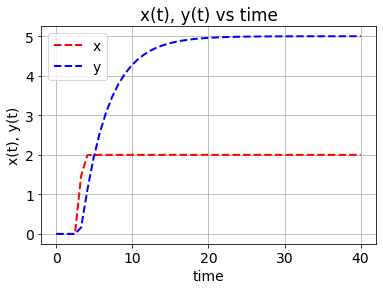

In [3]:
def model(z,t):
  x = z[0]
  y = z[1]
  if t >= 3: u = 1
  else: u = 0
  dx = -5*x + 10*u
  dy = (-2*y + 5*x)/7

  return [dx,dy]

#Initial condition
x0 =y0 = 0 

#Time points
t = np.linspace(0,40)

#Solving ode
soln = odeint(model, [x0,y0], t)
#soln [x,y]

#plotting results
fig = plt.figure()
plt.plot(t, soln[:,0], 'r--', linewidth=2, label='x')
plt.plot(t, soln[:,1], 'b--', linewidth=2, label='y')
plt.xlabel('time')
plt.ylabel('x(t), y(t)')

plt.legend()
plt.grid(True)
plt.title('x(t), y(t) vs time')
plt.show()

# Example 3 - Second order ODE

Solving the spring mass damper (Second order ODE)

Equation: 
\begin{equation}
M \frac{d^2y}{dt^2} + R\frac{dy}{dt} + ky(t) = 0 \tag{1}
\end{equation}

\begin{equation}
y(0)=-2, \dot{y(t)}=4, M=1, R=0.1, k=0.2
\end{equation}

Plot the motion of the mass damper system in the y-direction.

In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

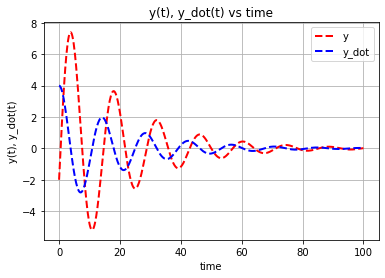

In [4]:
#This exercise can easily be extended for towe variables or more.
#Here our z = [y, y_dot], dz = [y_dot, y_double_dot]

#Using similar steps from previous code block
#defining global constans
M, R, k = 1, 0.1, 0.2

# z = [y, y_dot]
def model(z,t):
  """
  Model returns the derivative of z.
  Arguments: z, t
  Returns: dz [y_dot, y_double_dot]
  """
  y = z[0]
  y_dot = z[1]

  y_ddot = ( -R*y_dot - k*y )/M

  return [y_dot, y_ddot]

#Initial condition
y0=-2
y_dot0=4

#Time points
t = np.linspace(0,100,500)

#Solving ode
soln = odeint(model, [y0,y_dot0], t)
#soln [x,y]

#plotting results
fig = plt.figure()
plt.plot(t, soln[:,0], 'r--', linewidth=2, label='y')
plt.plot(t, soln[:,1], 'b--', linewidth=2, label='y_dot')
plt.xlabel('time')
plt.ylabel('y(t), y_dot(t)')

plt.legend()
plt.grid(True)
plt.title('y(t), y_dot(t) vs time')
plt.show()

# Example 4 - Second order ODE

The differential equation that we will attempt to solve is:

\begin{equation}
z =−1/z(z''^2+bz'+gz-gh)
\end{equation}

In this expression, 
z is the height of water inside a straw with one end partially submerged in a cup of water. Oscillations of the water level are induced by an initial pressure difference between the inside of the straw and the surface of the water in the cup (at one atmosphere). For more details, see R. P. Smith and E. H. Matlis, American Journal of Physics 87, 433 (2019).

g = 9.81 m/s2

h is the depth that the straw is submerged in the water

b is a drag coefficient

In [6]:
g = 9.81 # m/s^2
h = 0.10 # m
b = 0.25 # m/s

The strategy to solve a second-order differential equation using odeint() is to write the equation as a system of two first-order equations. This is achieved by first writing 
\begin{equation}
x[1]=z'
\end{equation}

 and
 
\begin{equation}
x[0]=z
\end{equation}

In that case, or original second-order equation can be expressed as:

\begin{equation}
z''=x'[1]=-1/x[0](x[1]^2+bx[1]+gx[0]-gh)
\end{equation}

One of our first-order equations is the expression above and the other is simply 

\begin{equation}
z'=x[1]
\end{equation}

In [7]:
def z_derivatives(x, t):
    return [x[1], -(1/x[0])*(x[1]**2 + b*x[1] + g*x[0] - g*h)]

In [8]:
time = np.arange(0, 3, 1e-3)

In [9]:
position, velocity = odeint(z_derivatives, [2e-3, 0], time).T  

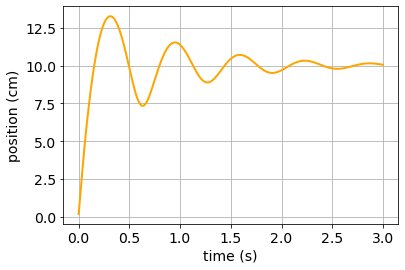

In [10]:
plt.plot(time, position*100, 'orange', linewidth = 2)
plt.xlabel('time (s)')
plt.ylabel('position (cm)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.grid(True)

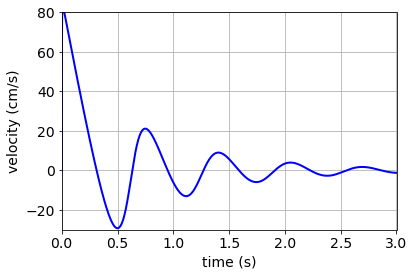

In [11]:
plt.plot(time, velocity*100, 'blue', linewidth = 2)
plt.xlabel('time (s)')
plt.ylabel('velocity (cm/s)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.grid(True)
plt.axis((0, 3, -30, 80));

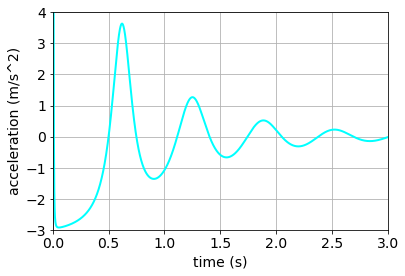

In [12]:
_, a = z_derivatives([position, velocity], time)
plt.plot(time, a, 'cyan', linewidth = 2)
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.grid(True)
plt.axis((0, 3, -3, 4));

# Example 5 - Second order ODE

\begin{equation}
y''(t) = -2*y(t) - 3*y'(t)
\end{equation}

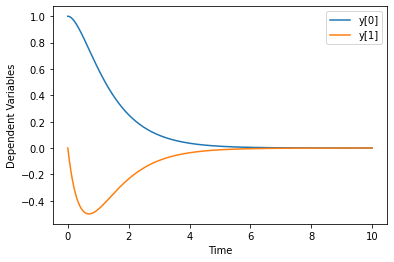

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def f(y, t):
    # Define the system of 2nd order ODEs
    # Here, y[0] and y[1] are the dependent variables, and t is the independent variable
    f0 = y[1]
    f1 = -2*y[0] - 3*y[1]
    return [f0, f1]

# Define the initial conditions and time span
y0 = [1, 0]   # initial values of y[0] and y[1]
t = np.linspace(0, 10, 1000)   # time span

# Solve the ODEs using odeint
sol = odeint(f, y0, t)

# Plot the results
plt.plot(t, sol[:,0], label='y[0]')
plt.plot(t, sol[:,1], label='y[1]')
plt.xlabel('Time')
plt.ylabel('Dependent Variables')
plt.legend()
plt.show()

# Example 6 - A system of Second order ODE

a system of two second-order ODEs, which describes the motion of a double pendulum:

$$
\begin{aligned}
\frac{d\theta_1}{dt} &= \omega_1 \\
\frac{d\theta_2}{dt} &= \omega_2 \\
\frac{d\omega_1}{dt} &= \frac{-g(2m_1 + m_2)\sin\theta_1 - m_2 g\sin(\theta_1 - 2\theta_2) - 2\sin(\theta_1 - \theta_2)m_2(\omega_2^2 l_2 + \omega_1^2 l_1\cos(\theta_1 - \theta_2))}{l_1(2m_1 + m_2 - m_2\cos(2\theta_1 - 2\theta_2))} \\
\frac{d\omega_2}{dt} &= \frac{2\sin(\theta_1 - \theta_2)(\omega_1^2 l_1(m_1 + m_2) + g(m_1 + m_2)\cos\theta_1 + \omega_2^2 l_2 m_2\cos(\theta_1 - \theta_2))}{l_2(2m_1 + m_2 - m_2\cos(2\theta_1 - 2\theta_2))}
\end{aligned}
$$


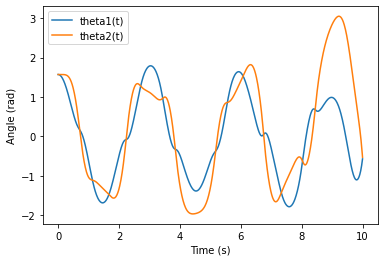

In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the system of ODEs
def system(y, t, l1, l2, m1, m2, g):
    theta1, omega1, theta2, omega2 = y
    dtheta1dt = omega1
    dtheta2dt = omega2
    domega1dt = (-g*(2*m1 + m2)*np.sin(theta1) - m2*g*np.sin(theta1 - 2*theta2) - 
                 2*np.sin(theta1 - theta2)*m2*(omega2**2*l2 + omega1**2*l1*np.cos(theta1 - theta2))) / (l1*(2*m1 + m2 - m2*np.cos(2*theta1 - 2*theta2)))
    domega2dt = (2*np.sin(theta1 - theta2)*(omega1**2*l1*(m1 + m2) + g*(m1 + m2)*np.cos(theta1) + 
                 omega2**2*l2*m2*np.cos(theta1 - theta2))) / (l2*(2*m1 + m2 - m2*np.cos(2*theta1 - 2*theta2)))
    return [dtheta1dt, domega1dt, dtheta2dt, domega2dt]

# Parameters
l1 = 1.0  # length of first pendulum arm
l2 = 1.0  # length of second pendulum arm
m1 = 1.0  # mass of first pendulum bob
m2 = 1.0  # mass of second pendulum bob
g = 9.81  # acceleration due to gravity

# Initial conditions
theta1_0 = np.pi/2  # initial angle of first pendulum
omega1_0 = 0.0      # initial angular velocity of first pendulum
theta2_0 = np.pi/2  # initial angle of second pendulum
omega2_0 = 0.0      # initial angular velocity of second pendulum
y0 = [theta1_0, omega1_0, theta2_0, omega2_0]

# Time points for integration
t = np.linspace(0, 10, 1000)

# Solve the system of ODEs
sol = odeint(system, y0, t, args=(l1, l2, m1, m2, g))

# Plot the results
plt.plot(t, sol[:, 0], label='theta1(t)')
plt.plot(t, sol[:, 2], label='theta2(t)')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.show()

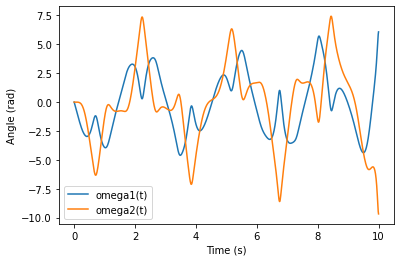

In [6]:
plt.plot(t, sol[:, 1], label='omega1(t)')
plt.plot(t, sol[:, 3], label='omega2(t)')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.show()